✅ API key loaded from .env file.
✅ Stored embeddings for product images.

🔍 Similarities with uploaded image:
mix.png → Similarity = 0.9945
whiteshoes.png → Similarity = 0.9945
whiteshoesdouble.png → Similarity = 0.9945
newwhite.png → Similarity = 0.9931
whiteshoesopposite.png → Similarity = 0.9949
image1.png → Similarity = 0.9946
image2.png → Similarity = 0.9954
image3.png → Similarity = 0.9943
image4.png → Similarity = 0.9945


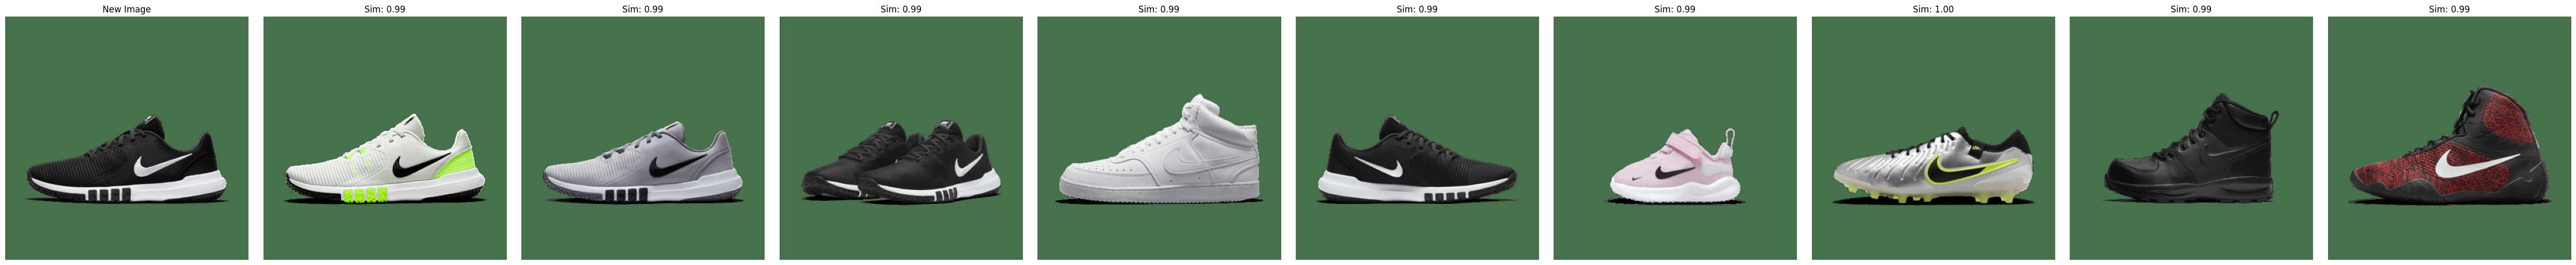


✅ Most similar image is: image2.png


In [7]:
import numpy as np
import base64
from PIL import Image
from io import BytesIO
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from langchain_google_genai import GoogleGenerativeAIEmbeddings 
load_dotenv()
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
if not GEMINI_API_KEY:
    raise ValueError("GEMINI_API_KEY is not set in the .env file.")

print("✅ API key loaded from .env file.") 
gemini_embeddings = GoogleGenerativeAIEmbeddings(
    model="models/embedding-001",
    google_api_key=GEMINI_API_KEY
)
 
def image_to_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")
    
def get_embedding_from_base64(base64_image): 
    return np.array(gemini_embeddings.embed_query(base64_image))

def cosine_similarity(vec1, vec2):
    vec1 = vec1 / np.linalg.norm(vec1)
    vec2 = vec2 / np.linalg.norm(vec2)
    return np.dot(vec1, vec2)
 
product_embeddings = []
product_base64s = [] 
image_paths = ['./mix.png' ,'./whiteshoes.png','./whiteshoesdouble.png','./newwhite.png', './whiteshoesopposite.png' ,'./image1.png', './image2.png', './image3.png', './image4.png']
  

for path in image_paths:
    b64 = image_to_base64(path)
    product_base64s.append(b64)
    embedding = get_embedding_from_base64(b64)
    product_embeddings.append(embedding) 

print("✅ Stored embeddings for product images.")

 
new_image_path = './image5.png'
new_b64 = image_to_base64(new_image_path)
new_embedding = get_embedding_from_base64(new_b64)
 
threshold = 0.60  
matching_images = []
 
for idx, emb in enumerate(product_embeddings):
    sim = cosine_similarity(new_embedding, emb)
    print(f"{os.path.basename(image_paths[idx])} → Similarity = {sim:.4f}")
    if sim >= threshold:
        matching_images.append((idx, sim)) 
if matching_images:
    new_image = Image.open(new_image_path).convert("RGB")
    fig, axes = plt.subplots(1, len(matching_images) + 1, figsize=(5 * (len(matching_images) + 1), 5)) 
    axes[0].imshow(new_image)
    axes[0].axis('off')
    axes[0].set_title("New Image")
 
    for i, (idx, sim) in enumerate(matching_images):
        matched_image = Image.open(image_paths[idx]).convert("RGB")
        axes[i + 1].imshow(matched_image)
        axes[i + 1].axis('off')
        axes[i + 1].set_title(f"Sim: {sim:.2f}")

    plt.tight_layout()
    plt.show()

else:
    print("\n❌ No images found with similarity greater than {:.2f}.".format(threshold)) 
best_idx = np.argmax([cosine_similarity(new_embedding, emb) for emb in product_embeddings])
print(f"\n✅ Most similar image is: {os.path.basename(image_paths[best_idx])}")
